In [37]:
from typing import List
from collections import Counter

def raw_majority_vote(labels: List[str]) -> str:
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner


print("Winner of raw_majority_vote(['a','b','c','b']) is ", raw_majority_vote(['a','b','c','b']))

Winner of raw_majority_vote(['a','b','c','b']) is  b


In [38]:
def majority_vote(labels: List[str]) -> str:
    # Assume labels are ordered from nearest to farthest
    vote_counts = Counter(labels)
    winner, winner_count =  vote_counts.most_common(1)[0]
    
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])
    if num_winners == 1:
        return winner  #if unique winner then return
    else:
        return majority_vote(labels[:-1]) #try again without the farthest
    

print("Winner of majority_vote(['a','b','c','b','a']) is ", majority_vote(['a','b','c','b','a']))    

Winner of majority_vote(['a','b','c','b','a']) is  b


In [53]:
from typing import NamedTuple
from Vector_operations_on_data import Vector, distance

class LabeledPoint (NamedTuple):
    point: Vector
    label: str
      
def knn_classify(k: int,
                 labeled_points: List[Vector],
                 new_point: Vector) -> str:
    
    # Order the labeled points from nearest to farthest    
    by_distance = sorted(labeled_points,
                         key=lambda lp: distance(lp.point, new_point))
    
    # Find the labels for the k closest
    k_nearest_labels = [lp.label for lp in by_distance[:k]]
    
    # Let them vote
    return majority_vote(k_nearest_labels)

        

In [54]:
# Download Iris dataset
import requests
data = requests.get(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

with open('iris.csv','w') as f:
    f.write(data.text)
data.text

'5.1,3.5,1.4,0.2,Iris-setosa\n4.9,3.0,1.4,0.2,Iris-setosa\n4.7,3.2,1.3,0.2,Iris-setosa\n4.6,3.1,1.5,0.2,Iris-setosa\n5.0,3.6,1.4,0.2,Iris-setosa\n5.4,3.9,1.7,0.4,Iris-setosa\n4.6,3.4,1.4,0.3,Iris-setosa\n5.0,3.4,1.5,0.2,Iris-setosa\n4.4,2.9,1.4,0.2,Iris-setosa\n4.9,3.1,1.5,0.1,Iris-setosa\n5.4,3.7,1.5,0.2,Iris-setosa\n4.8,3.4,1.6,0.2,Iris-setosa\n4.8,3.0,1.4,0.1,Iris-setosa\n4.3,3.0,1.1,0.1,Iris-setosa\n5.8,4.0,1.2,0.2,Iris-setosa\n5.7,4.4,1.5,0.4,Iris-setosa\n5.4,3.9,1.3,0.4,Iris-setosa\n5.1,3.5,1.4,0.3,Iris-setosa\n5.7,3.8,1.7,0.3,Iris-setosa\n5.1,3.8,1.5,0.3,Iris-setosa\n5.4,3.4,1.7,0.2,Iris-setosa\n5.1,3.7,1.5,0.4,Iris-setosa\n4.6,3.6,1.0,0.2,Iris-setosa\n5.1,3.3,1.7,0.5,Iris-setosa\n4.8,3.4,1.9,0.2,Iris-setosa\n5.0,3.0,1.6,0.2,Iris-setosa\n5.0,3.4,1.6,0.4,Iris-setosa\n5.2,3.5,1.5,0.2,Iris-setosa\n5.2,3.4,1.4,0.2,Iris-setosa\n4.7,3.2,1.6,0.2,Iris-setosa\n4.8,3.1,1.6,0.2,Iris-setosa\n5.4,3.4,1.5,0.4,Iris-setosa\n5.2,4.1,1.5,0.1,Iris-setosa\n5.5,4.2,1.4,0.2,Iris-setosa\n4.9,3.1,1.5,0

In [55]:
from typing import Dict
import csv
from collections import defaultdict

def parse_iris_row(row: List[str]) -> LabeledPoint:
    "sepal_length, sepal_width, petal_length, petal_width, class"
    measurements = [float(value) for value in row[:-1]]
    
    #Let's assume e.g. class "Iris-virginica" and we just want "virginica"
    label = row[-1].split("-")[-1]
    
    return LabeledPoint(measurements, label)

with open('iris.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    iris_data = []
    for row in csv_reader:
        iris_data.append(row)
    print(f'Processed {line_count} lines.')


Processed 0 lines.


In [56]:
iris_data

[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
 ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
 ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
 ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
 ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
 ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
 ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
 ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
 ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
 ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
 ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
 ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
 ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
 ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
 ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa'],
 ['5.4', '3.4', '1.7', '0.2', 'Iris-setosa'],
 ['5.1', '3.7', '1.5', '0.4', 'Iri

In [57]:
iris_data = iris_data[:-2]

iris_data = [parse_iris_row(row) for row in iris_data]
iris_data

[LabeledPoint(point=[5.1, 3.5, 1.4, 0.2], label='setosa'),
 LabeledPoint(point=[4.9, 3.0, 1.4, 0.2], label='setosa'),
 LabeledPoint(point=[4.7, 3.2, 1.3, 0.2], label='setosa'),
 LabeledPoint(point=[4.6, 3.1, 1.5, 0.2], label='setosa'),
 LabeledPoint(point=[5.0, 3.6, 1.4, 0.2], label='setosa'),
 LabeledPoint(point=[5.4, 3.9, 1.7, 0.4], label='setosa'),
 LabeledPoint(point=[4.6, 3.4, 1.4, 0.3], label='setosa'),
 LabeledPoint(point=[5.0, 3.4, 1.5, 0.2], label='setosa'),
 LabeledPoint(point=[4.4, 2.9, 1.4, 0.2], label='setosa'),
 LabeledPoint(point=[4.9, 3.1, 1.5, 0.1], label='setosa'),
 LabeledPoint(point=[5.4, 3.7, 1.5, 0.2], label='setosa'),
 LabeledPoint(point=[4.8, 3.4, 1.6, 0.2], label='setosa'),
 LabeledPoint(point=[4.8, 3.0, 1.4, 0.1], label='setosa'),
 LabeledPoint(point=[4.3, 3.0, 1.1, 0.1], label='setosa'),
 LabeledPoint(point=[5.8, 4.0, 1.2, 0.2], label='setosa'),
 LabeledPoint(point=[5.7, 4.4, 1.5, 0.4], label='setosa'),
 LabeledPoint(point=[5.4, 3.9, 1.3, 0.4], label='setosa'

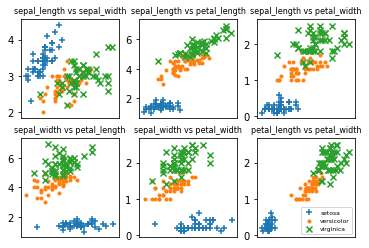

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

In [58]:
# group the points by species for plotting
points_by_species: Dict[str, List[Vector]] = defaultdict(list)
for iris in iris_data:
    points_by_species[iris.label].append(iris.point)
    
from matplotlib import pyplot as plt
metrics = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
pairs = [(i,j) for i in range(4) for j in range(4) if i<j]
marks = ['+','.','x'] # 3 markers for 3 classes

fig, ax = plt.subplots(2,3)

for row in range(2):
    for col in range(3):
        i,j = pairs [3*row+col]
        ax[row][col].set_title(f"{metrics[i]} vs {metrics[j]}", fontsize = 8)
        ax[row][col].set_xticks([])
        ax[row][col].set_xticks([])
        
        for mark, (species, points) in zip(marks, points_by_species.items()):
            xs = [point[i] for point in points]
            ys = [point[j] for point in points]
            ax[row][col].scatter(xs,ys, marker = mark, label = species)
            
ax[-1][-1].legend(loc = 'lower right', prop = {'size':6})
plt.show()
pairs
       

In [63]:
import random
from machine_learning import split_data
import math

random.seed(12)
iris_train,iris_test = split_data(iris_data, 0.70)

from typing import Tuple

# Track how many times we see (predicted, actual)
confusion_matrix: Dict[Tuple[str, str], int] = defaultdict(int)
num_correct = 0

k = 5
for iris in iris_test:
    predicted = knn_classify(k, iris_train, iris.point)
    actual = iris.label
    
    if predicted == actual:
        num_correct += 1
        
    confusion_matrix[(predicted, actual)]+=1
    
pct_correct = num_correct/len(iris_test)
print(pct_correct, confusion_matrix)

1.0 defaultdict(<class 'int'>, {('versicolor', 'versicolor'): 16, ('setosa', 'setosa'): 13, ('virginica', 'virginica'): 16})


Curse of Dimensionality: 100%|███████████████████████████████████████████████████████| 100/100 [00:17<00:00,  3.13it/s]


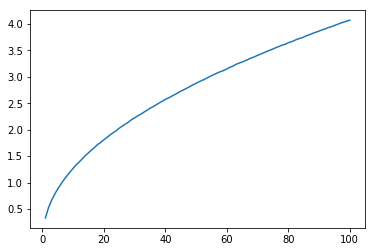

In [64]:
# curse of dimensionality
def random_point(dim: int) -> Vector:
    return [random.random() for _ in range(dim)]

def random_distance(dim: int, num_pairs: int) -> List[float]:
    return [distance(random_point(dim), random_point(dim)) 
            for _ in range(num_pairs)]
import tqdm
dimensions = range(1,101)
avg_distances = []
min_distances = []
random.seed(0)
for dim in tqdm.tqdm(dimensions, desc = "Curse of Dimensionality"):
    distances = random_distance(dim, 10000) # 10,000 random pairs
    avg_distances.append(sum(distances) / 10000) # track averages
    min_distances.append(min(distances)) # track minimums
    
plt.plot(dimensions, avg_distances)

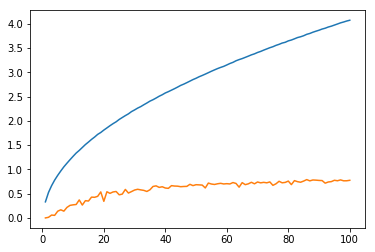

In [65]:
min_avg_ratio = [min_dist / avg_dist 
                for min_dist, avg_dist in zip(min_distances, avg_distances)]
plt.plot(dimensions, avg_distances)
plt.plot(dimensions, min_avg_ratio)